# FIRST SUBMISSION

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
! pip install folium==0.5.0
import folium # map rendering library

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from sklearn.cluster import KMeans # import k-means from clustering stage
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Libraries imported.')

Libraries imported.


In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
toronto_data_wiki_df = pd.read_html(url) #Reach HTML
len(toronto_data_wiki_df) #Total number of tables found

3

In [3]:
print(toronto_data_wiki_df[0].head()) #Explore tables to choose right
print(toronto_data_wiki_df[1].head())
print(toronto_data_wiki_df[2].head())

  Postal Code           Borough              Neighbourhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront
                                                  0   \
0                                                NaN   
1  NL NS PE NB QC ON MB SK AB BC NU/NT YT A B C E...   
2                                                 NL   
3                                                  A   

                                                  1   \
0                              Canadian postal codes   
1  NL NS PE NB QC ON MB SK AB BC NU/NT YT A B C E...   
2                                                 NS   
3                                                  B   

                                                  2    3    4    5    6    7   \
0  

In [4]:
toronto_data_df = toronto_data_wiki_df[0] #Select correct table
print(toronto_data_df.head())
print(toronto_data_df.describe())

  Postal Code           Borough              Neighbourhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront
       Postal Code       Borough Neighbourhood
count          180           180           180
unique         180            11           100
top            M8N  Not assigned  Not assigned
freq             1            77            77


In [5]:
toronto_data = toronto_data_df[toronto_data_df.Borough != "Not assigned"] #Remove cells with "Not assigned"
print (toronto_data['Borough'].value_counts(dropna=False))

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
East York            5
East Toronto         5
York                 5
Mississauga          1
Name: Borough, dtype: int64


In [6]:
toronto_data = toronto_data.groupby(['Postal Code', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index() #group by Postal Code, Neighbourhood separated by comma
toronto_data

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [7]:
toronto_data.shape

(103, 3)

# SECOND SUBMISSION

In [8]:
geo_coord_df = pd.read_csv('https://cocl.us/Geospatial_data', index_col='Postal Code') #Dataframe csv
geo_coord_df.head()

,Latitude,Longitude
Postal Code,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


In [9]:
toronto_data = toronto_data.groupby(['Postal Code', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()
toronto_data = toronto_data.join(geo_coord_df, on='Postal Code') #Dataframe with latitude and longitude
toronto_data.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


## THIRD SUBMISSION

In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(len(toronto_data['Borough'].unique()), toronto_data.shape[0])) #Information about data

The dataframe has 10 boroughs and 103 neighborhoods.


In [11]:
address = 'Toronto, CA'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [12]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10) # create map of Toronto using latitude and longitude values

# add markers to map
for lat, lng, borough, neighbourhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Define Foursquare Credentials and Version

### Neighborhoods and venues in Toronto

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'], latitudes=toronto_data['Latitude'], longitudes=toronto_data['Longitude'])
print(toronto_venues.shape) #size of the resulting dataframe

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [16]:
print(toronto_venues.shape) #size of the resulting dataframe
toronto_venues.head()

(2116, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Great Shine Window Cleaning,43.783145,-79.157431,Home Service
2,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


In [17]:
toronto_venues.groupby('Neighborhood').count() #How many venues were returned for each neighborhood

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
Berczy Park,55,55,55,55,55,55
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",14,14,14,14,14,14


In [18]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 271 uniques categories.


### Analyze Each Neighborhood

In [19]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head(11)

,Yoga Studio,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [20]:
toronto_onehot.shape

(2116, 271)

In [21]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index() #Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000

In [22]:
num_top_venues = 5 #Print each neighborhood along with the top 5 most common venues

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                        venue  freq
0              Breakfast Spot  0.25
1                Skating Rink  0.25
2                      Lounge  0.25
3   Latin American Restaurant  0.25
4  Modern European Restaurant  0.00


----Alderwood, Long Branch----
          venue  freq
0   Pizza Place  0.29
1   Coffee Shop  0.14
2  Skating Rink  0.14
3           Pub  0.14
4      Pharmacy  0.14


----Bathurst Manor, Wilson Heights, Downsview North----
          venue  freq
0   Coffee Shop  0.10
1          Bank  0.10
2          Park  0.05
3  Intersection  0.05
4   Bridal Shop  0.05


----Bayview Village----
                 venue  freq
0  Japanese Restaurant  0.25
1                 Café  0.25
2                 Bank  0.25
3   Chinese Restaurant  0.25
4                Motel  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0  Italian Restaurant  0.12
1         Coffee Shop  0.08
2      Sandwich Place  0.08
3         Pizza Place  0.08
4        Liquor Store  0.04

                        venue  freq
0            Basketball Court  0.25
1                      Bakery  0.25
2                        Park  0.25
3  Construction & Landscaping  0.25
4                 Yoga Studio  0.00


----North Toronto West, Lawrence Park----
                 venue  freq
0       Clothing Store  0.16
1          Coffee Shop  0.11
2          Yoga Studio  0.05
3  Sporting Goods Shop  0.05
4   Italian Restaurant  0.05


----Northwest, West Humber - Clairville----
                 venue  freq
0           Truck Stop   0.2
1        Garden Center   0.2
2                  Bar   0.2
3  Rental Car Location   0.2
4            Drugstore   0.2


----Northwood Park, York University----
                    venue  freq
0  Furniture / Home Store  0.25
1      Falafel Restaurant  0.12
2          Massage Studio  0.12
3             Coffee Shop  0.12
4           Metro Station  0.12


----Old Mill South, King's Mill Park, Sunnylea, Humber Bay, Mimico NE, The Queensway East, Royal York South Ea

### Put into a pandas dataframe the top venues

In [23]:
def return_most_common_venues(row, num_top_venues): #Sort the venues in descending order
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

Initialization complete
Iteration 0, inertia 40.75702929384316
Iteration 1, inertia 19.01651656229271
Converged at iteration 1: center shift 0.0 within tolerance 7.336619044094407e-08
Initialization complete
Iteration 0, inertia 43.75064068212999
Iteration 1, inertia 19.01651656229271
Converged at iteration 1: center shift 0.0 within tolerance 7.336619044094407e-08
Initialization complete
Iteration 0, inertia 66.17427872251862
Iteration 1, inertia 19.01651656229271
Converged at iteration 1: center shift 0.0 within tolerance 7.336619044094407e-08
Initialization complete
Iteration 0, inertia 35.4519989657693
Iteration 1, inertia 19.01651656229271
Converged at iteration 1: center shift 0.0 within tolerance 7.336619044094407e-08
Initialization complete
Iteration 0, inertia 114.70475855878877
Iteration 1, inertia 19.01651656229271
Converged at iteration 1: center shift 0.0 within tolerance 7.336619044094407e-08
Initialization complete
Iteration 0, inertia 22.45882171467185
Iteration 1, iner

Iteration 3, inertia 13.507640134365971
Converged at iteration 3: center shift 0.0 within tolerance 7.336619044094407e-08
Initialization complete
Iteration 0, inertia 16.67562861968005
Iteration 1, inertia 13.375074817274232
Iteration 2, inertia 13.032896348313026
Iteration 3, inertia 12.680591849319065
Iteration 4, inertia 12.658175902224253
Converged at iteration 4: center shift 0.0 within tolerance 7.336619044094407e-08
Initialization complete
Iteration 0, inertia 18.996078939402153
Iteration 1, inertia 14.25342597521306
Iteration 2, inertia 13.993931150534687
Iteration 3, inertia 13.904983626999192
Iteration 4, inertia 13.844225203742642
Iteration 5, inertia 13.821786671237055
Converged at iteration 5: center shift 0.0 within tolerance 7.336619044094407e-08
Initialization complete
Iteration 0, inertia 15.907866058875634
Iteration 1, inertia 13.702154481809943
Iteration 2, inertia 13.18529170938742
Iteration 3, inertia 13.052884262426176
Iteration 4, inertia 13.02518065963395
Conver

Iteration 3, inertia 10.717594700161966
Converged at iteration 3: center shift 0.0 within tolerance 7.336619044094407e-08
Initialization complete
Iteration 0, inertia 14.144966924721956
Iteration 1, inertia 11.747612376779973
Iteration 2, inertia 11.472194127472147
Iteration 3, inertia 11.414244914815015
Iteration 4, inertia 11.392804370466356
Converged at iteration 4: center shift 0.0 within tolerance 7.336619044094407e-08
Initialization complete
Iteration 0, inertia 13.698981320870152
Iteration 1, inertia 10.708879859478293
Iteration 2, inertia 10.415361934953745
Iteration 3, inertia 10.36650316811963
Iteration 4, inertia 10.364005856555236
Iteration 5, inertia 10.360081341243315
Converged at iteration 5: center shift 0.0 within tolerance 7.336619044094407e-08
Initialization complete
Iteration 0, inertia 14.139717568200123
Iteration 1, inertia 12.145928240874023
Converged at iteration 1: center shift 0.0 within tolerance 7.336619044094407e-08
Initialization complete
Iteration 0, iner

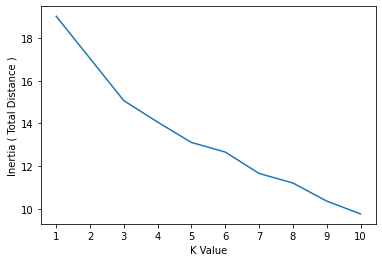

In [24]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

#Create a function that calculates Inertia for n times
#We will sweep through 1 to n to find the optimal cluster number
def cluster_variance(n):
    variances=[]
    kmeans=[]
    outputs=[]
    K=[i for i in range(1,n+1)]
    for i in range(1,n+1):
        variance=0
        model=KMeans(n_clusters=i,random_state=82,verbose=2).fit(toronto_grouped_clustering)
        kmeans.append(model)
        variances.append(model.inertia_)
        
    return variances,K,n
variances,K,n=cluster_variance(10)
plt.plot(K,variances)
plt.ylabel("Inertia ( Total Distance )")
plt.xlabel("K Value")
plt.xticks([i for i in range(1,n+1)])
plt.show()

In [25]:
num_top_venues = 10 #New dataframe and display with the top 10 venues for each neighborhood.

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Latin American Restaurant,Skating Rink,Breakfast Spot,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
1,"Alderwood, Long Branch",Pizza Place,Gym,Skating Rink,Coffee Shop,Pub,Pharmacy,Airport Gate,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Fried Chicken Joint,Shopping Mall,Diner,Bridal Shop,Sandwich Place,Deli / Bodega,Intersection,Restaurant
3,Bayview Village,Chinese Restaurant,Café,Japanese Restaurant,Bank,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Women's Store
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Pizza Place,Coffee Shop,Sandwich Place,Liquor Store,Butcher,Sushi Restaurant,Pub,Café,Hobby Shop


In [26]:
# set number of clusters
kclusters = 5 #Elbow point

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [27]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')
toronto_merged = toronto_merged.dropna()
toronto_merged.shape

(100, 16)

In [28]:
toronto_merged["Cluster Labels"] = toronto_merged["Cluster Labels"].astype(np.uint8)
toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,3,Fast Food Restaurant,Women's Store,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,1,Home Service,Bar,Women's Store,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1,Electronics Store,Restaurant,Rental Car Location,Intersection,Breakfast Spot,Mexican Restaurant,Medical Center,Bank,Dim Sum Restaurant,Dessert Shop
3,M1G,Scarborough,Woburn,43.770992,-79.216917,1,Coffee Shop,Indian Restaurant,Korean BBQ Restaurant,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,1,Lounge,Caribbean Restaurant,Fried Chicken Joint,Bakery,Athletics & Sports,Bank,Thai Restaurant,Gas Station,Hakka Restaurant,Dog Run


In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

In [30]:
cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1,2] + list(range(5, toronto_merged.shape[1]))]]
cluster1

,Borough,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,Scarborough Village,0,Playground,Women's Store,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
14,Scarborough,"Milliken, Agincourt North, Steeles East, L'Amo...",0,Park,Playground,Intersection,Women's Store,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
21,North York,"Willowdale, Newtonbrook",0,Park,Women's Store,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
23,North York,York Mills West,0,Construction & Landscaping,Park,Convenience Store,Women's Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
25,North York,Parkwoods,0,Construction & Landscaping,Park,Food & Drink Shop,Women's Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
40,East York,"East Toronto, Broadview North (Old East York)",0,Park,Intersection,Convenience Store,Women's Store,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center
44,Central Toronto,Lawrence Park,0,Bus Line,Park,Swim School,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Women's Store
50,Downtown Toronto,Rosedale,0,Park,Trail,Playground,Women's Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
64,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",0,Park,Sushi Restaurant,Jewelry Store,Trail,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center
74,York,Caledonia-Fairbanks,0,Park,Women's Store,Pool,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store


In [31]:
cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1,2] + list(range(5, toronto_merged.shape[1]))]]
cluster2

,Borough,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Scarborough,"Rouge Hill, Port Union, Highland Creek",1,Home Service,Bar,Women's Store,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
2,Scarborough,"Guildwood, Morningside, West Hill",1,Electronics Store,Restaurant,Rental Car Location,Intersection,Breakfast Spot,Mexican Restaurant,Medical Center,Bank,Dim Sum Restaurant,Dessert Shop
3,Scarborough,Woburn,1,Coffee Shop,Indian Restaurant,Korean BBQ Restaurant,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
4,Scarborough,Cedarbrae,1,Lounge,Caribbean Restaurant,Fried Chicken Joint,Bakery,Athletics & Sports,Bank,Thai Restaurant,Gas Station,Hakka Restaurant,Dog Run
6,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",1,Discount Store,Hobby Shop,Coffee Shop,Department Store,Convenience Store,Bus Station,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner
7,Scarborough,"Golden Mile, Clairlea, Oakridge",1,Bakery,Park,Ice Cream Shop,Metro Station,Bus Line,Soccer Field,Comfort Food Restaurant,Comic Shop,Eastern European Restaurant,Dumpling Restaurant
8,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",1,Motel,American Restaurant,Women's Store,Curling Ice,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
9,Scarborough,"Birch Cliff, Cliffside West",1,College Stadium,Café,Skating Rink,General Entertainment,Women's Store,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
10,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",1,Indian Restaurant,Light Rail Station,Vietnamese Restaurant,Chinese Restaurant,Pet Store,Gift Shop,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant
11,Scarborough,"Wexford, Maryvale",1,Auto Garage,Sandwich Place,Accessories Store,Smoke Shop,Middle Eastern Restaurant,Vietnamese Restaurant,Bakery,Department Store,Dessert Shop,Dim Sum Restaurant


In [32]:
cluster3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1,2] + list(range(5, toronto_merged.shape[1]))]]
cluster3

,Borough,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
91,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",2,Baseball Field,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Women's Store,Event Space
97,North York,"Humberlea, Emery",2,Baseball Field,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Women's Store,Event Space


In [33]:
cluster4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1,2] + list(range(5, toronto_merged.shape[1]))]]
cluster4

,Borough,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,"Malvern, Rouge",3,Fast Food Restaurant,Women's Store,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant


In [34]:
cluster5 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1,2] + list(range(5, toronto_merged.shape[1]))]]
cluster5

,Borough,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",4,Filipino Restaurant,Women's Store,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant


In [35]:
print("cluster1 shape:", cluster1.shape)
print("cluster2 shape:", cluster2.shape)
print("cluster3 shape:", cluster3.shape)
print("cluster4 shape:", cluster4.shape)
print("cluster5 shape:", cluster5.shape)

cluster1 shape: (13, 13)
cluster2 shape: (83, 13)
cluster3 shape: (2, 13)
cluster4 shape: (1, 13)
cluster5 shape: (1, 13)
